In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

# K-Means

In [2]:
df = pd.read_csv("USArrests.csv").copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
df.index = df.iloc[:,0]

In [ ]:
df.index

In [ ]:
df.head()

In [ ]:
df = df.iloc[:,1:5]

In [ ]:
df.head()

In [ ]:
#del df.index.name

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
df.hist(figsize = (10,10));

## K-MEANS Model ve Görselleştirme

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans

In [ ]:
?kmeans

In [ ]:
k_fit = kmeans.fit(df)

In [ ]:
k_fit.n_clusters

In [ ]:
k_fit.cluster_centers_

In [ ]:
k_fit.labels_

In [ ]:
#görsellestirme

In [ ]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)

In [ ]:
kumeler = k_fit.labels_

In [ ]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")

merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#!pip install --upgrade matplotlib
#import mpl_toolkits

In [ ]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

In [ ]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], 
           marker='*', 
           c='#050505', 
           s=1000);

In [ ]:
#kumeler ve gözlem birimleri

In [ ]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [ ]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

In [ ]:
df["kume_no"] = kumeler

In [ ]:
df.head()

In [ ]:
df["kume_no"] = df["kume_no"] + 1

In [ ]:
df.head()

# Optimum Kume Sayısının Belirlenmesi

In [ ]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df) 
visualizer.poof()  

In [ ]:
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [ ]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

# Hiyerarşik Kümeleme

In [2]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#del df.index.name
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

In [ ]:
dir(hc_complete)

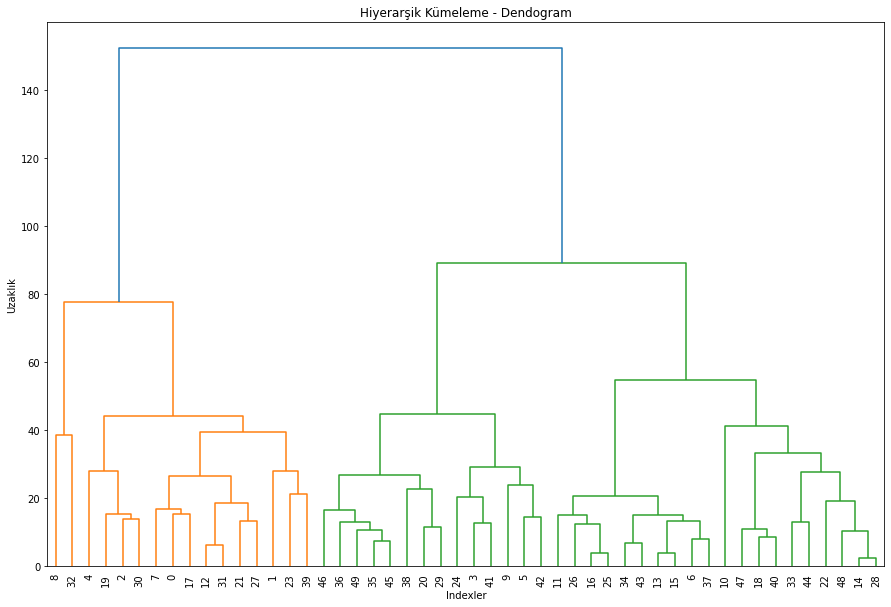

In [7]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_average,
    leaf_font_size=10
);

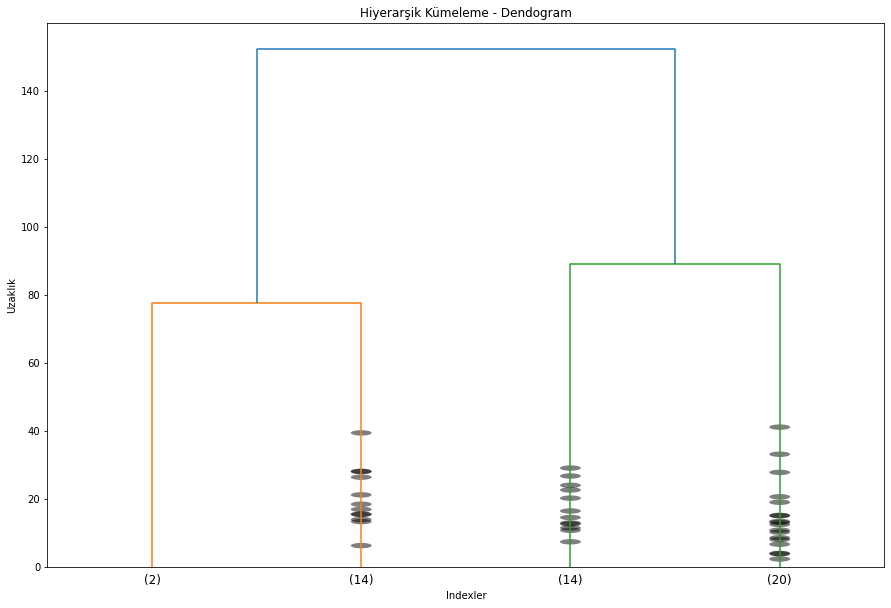

In [8]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_average,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True
);

## Optimum Küme Sayısı

In [ ]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(
    hc_complete,
    leaf_font_size=10
);

In [ ]:
?den

In [ ]:
?dendrogram

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(df)

In [ ]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": cluster.fit_predict(df)})[0:10]

In [ ]:
df["kume_no"] = cluster.fit_predict(df)

In [ ]:
df.head()

# PCA

In [ ]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#del df.index.name
df.head()

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)
df[0:5,0:5]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(df)

In [ ]:
bilesen_df = pd.DataFrame(data = pca_fit, 
                          columns = ["birinci_bilesen","ikinci_bilesen","ucuncu_bilesen"])

In [ ]:
bilesen_df.head()

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca = PCA().fit(df)

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))